<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подключение-необходимых-библиотек" data-toc-modified-id="Подключение-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение необходимых библиотек</a></span></li><li><span><a href="#Чтение-и-изучение-данных" data-toc-modified-id="Чтение-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение и изучение данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-вспомогательных-функций" data-toc-modified-id="Создание-вспомогательных-функций-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание вспомогательных функций</a></span></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Прогнозирование-медианным-значением" data-toc-modified-id="Прогнозирование-медианным-значением-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Прогнозирование медианным значением</a></span></li><li><span><a href="#Модель-линейная-регрессия" data-toc-modified-id="Модель-линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель линейная регрессия</a></span></li><li><span><a href="#Модель-эластичная-сеть" data-toc-modified-id="Модель-эластичная-сеть-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель эластичная сеть</a></span></li><li><span><a href="#Модель-Случайный-лес" data-toc-modified-id="Модель-Случайный-лес-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Модель Случайный лес</a></span></li><li><span><a href="#Модель-градиентный-бустинг-LightGBM" data-toc-modified-id="Модель-градиентный-бустинг-LightGBM-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Модель градиентный бустинг LightGBM</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Служба такси собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

<b>Цель исследования:</b> построить модель для прогнозирования количества заказов такси на следующий час на основании исторических данных.

<b>Этапы исследования</b>

1. Загрузка и изучение данных.
2. Предобработка данных.
3. Анализ данных.
4. Обучение моделей.
5. Сравнение моделей и выбор лучшей модели.
6. Тестирование выбранной модели.

## Подготовка

### Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as ltb

from statsmodels.tsa.seasonal import seasonal_decompose

### Чтение и изучение данных

In [2]:
# Запишу данные из файл, дату переведу в формат datetime и определю как индекс.
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Данные содержат кроме даты-индекса один столбец и 26496 строк. Тип данных столбца int. Название столбца соответствует стандарту. Данные в столбце 'num_orders' отражают количество вызовов такси в единицу времени.

In [4]:
# Проверю дату-индекс на монотонность.
data.index.is_monotonic

True

Индексы монотонны.

In [5]:
# Сэмплирую данные с дискретом в один час.
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [6]:
# Проверю даты-индексы на пропуски.
data['index_no_shift'] = data.index
data['index_shift'] = data['index_no_shift'].shift(1)
data['shift'] = data['index_no_shift'] - data['index_shift']
data['shift'] .unique()

array([        'NaT', 3600000000000], dtype='timedelta64[ns]')

In [7]:
data['shift'].isna().sum()

1

Для проверки даты-индекса на пропуски создал три дополнительных служебных столбца: первый - значения сэмплированной даты, второй - значения сэмплированной даты со сдвигом на 1 позицию, третий - их разность. В случае отсутствия пропусков в индексах в третьем столбце будут только два уникальных значения: 1 час и NaT. NaT возникает в нулевой строке из-за сдвига (то есть только одно значение NaT).

В результате проверки оказалось что действительно в столбце только два уникальных значения: NaT и 3600000000000 наносекунд (что соответствует одному часу). Строк с NaT одна. Пропусков в индексах нет.

In [8]:
# Удалю ненужные служебные столбцы.
data = data.drop(['index_no_shift', 'index_shift', 'shift'], axis=1)
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Количество вызовов в данных меняется от 0 до 462 в час. Медианное значение - 78 вызовов.

In [9]:
# Проверю данные на пропуски.
data.isna().sum()

num_orders    0
dtype: int64

Исходные данные содержат два столбца и 26496 строк. При чтении столбец, содержащий дату и время был преобразован в индекс и проверен на хронологичность и пропуски. Индексы хронологичны и пропусков в них нет. Название столбца соответствует стандарту. Данные представляют из себя временной ряд. Для дальнейшего анализа данные в таблице были сэмплированы с дискретом в один час. Пропусков в данных нет.

## Анализ

Построю график временного ряда.

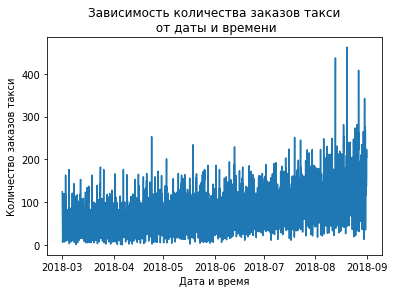

In [11]:
plt.title('Зависимость количества заказов такси\n от даты и времени')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов такси')
plt.plot(data);

Временной ряд, представленный на графике, имеет большие колебания значений. Проанализирую временной ряд с помощью функции seasonal_decompose() из модуля tsa.seasonal библиотеки statsmodels.

In [12]:
# Проведу декомпозицию.
decomposed = seasonal_decompose(data)

In [13]:
# Создам функцию для анализа данных.
def decompose_plot(decomposed, left, right):
    print('               Графики составляющих зависимости\n          количества заказов такси от даты и времени')
    
    plt.figure(figsize=(6,8))
    
    plt.subplot(311)
    decomposed.trend.plot(ax=plt.gca())
    plt.xlabel('Дата и время')
    plt.ylabel('Заказы такси')
    plt.xlim(left=left)
    plt.xlim(right=right)
    plt.title('Trend')

    plt.subplot(312)
    decomposed.seasonal.plot(ax=plt.gca())
    plt.xlabel('Дата и время')
    plt.ylabel('Заказы такси')
    plt.xlim(left=left)
    plt.xlim(right=right)
    plt.title('Seasonality')

    plt.subplot(313)
    decomposed.resid.plot(ax=plt.gca())
    plt.xlabel('Дата и время')
    plt.ylabel('Заказы такси')
    plt.xlim(left=left)
    plt.xlim(right=right)
    plt.title('Residuals')

    plt.tight_layout()

               Графики составляющих зависимости
          количества заказов такси от даты и времени


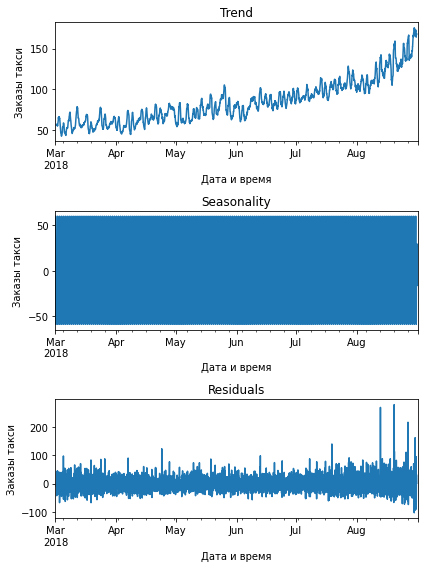

In [14]:
# С помощью функции decompose_plot() изучу временной ряд.
decompose_plot(decomposed, None, None)

Данные описывают интервал времени в несколько месяцев от 1 марта до 31 августа 2018 года. Этих данных недостаточно для определения ежегодной сезонности.

Тренд указывает на увеличение количества вызовов такси с течением времени. В остатках наблюдаются выбросы. О сезонности по этому графику что то сказать трудно. Попробую уменьшить интервал времени.

               Графики составляющих зависимости
          количества заказов такси от даты и времени


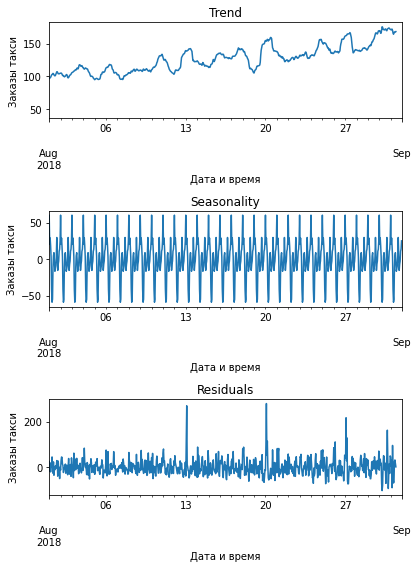

In [15]:
# Посмотрю данные за август.
left = pd.Timestamp('2018-08-01 00:00:00')
right = pd.Timestamp('2018-09-01 00:00:00')
decompose_plot(decomposed, left, right)

В августе 2018 года также наблюдается тренд на увеличение вызовов такси и просматривается ежедневная сезонность. Также можно отметить периодические выбросы в остатках с интервалом в 7 дней. Рассмотрю подробно одну несколько дней.

               Графики составляющих зависимости
          количества заказов такси от даты и времени


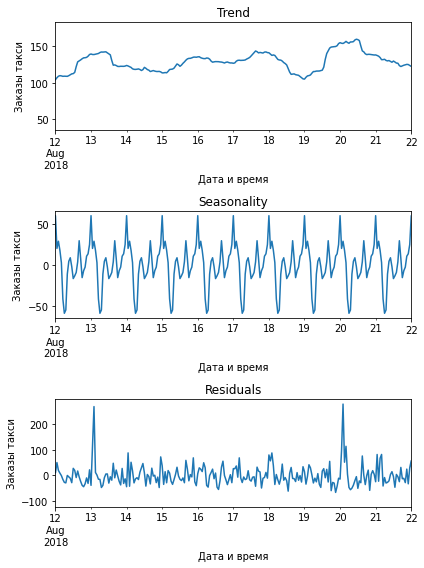

In [16]:
# Посмотрю данные с 12 по 21 августа.
left = pd.Timestamp('2018-08-12 00:00:00')
right = pd.Timestamp('2018-08-22 00:00:00')
decompose_plot(decomposed, left, right)

13 и 21 августа это понедельники. 

Анализируя тренд можно отметить высокий спрос на такси в ночь с воскресенья на понедельник и дальнейший спад спроса до среды. Затем спрос начинает расти и достигает максимума к вечеру пятницы-ночи на субботу. с вечера субботы до утра воскресенья - глубокий провал. К вечеру воскресенья спрос начинает расти и достигает максимума ночью с воскресенья на понедельник.

Высокий спрос в ночь с воскресенья на понедельник также подтверждают высокие выбросы в остатке.

Такое поведение спроса, скорее всего, связано с планированием людьми начала своего отдыха на конец недели (увеличение спроса на такси к вечеру пятницы)и окончания отпуска - на воскресенье (увеличение спроса к вечеру воскресенья).

Также можно отметить ежедневную сезонность. Дл яее изучения рассмотрим интервал в два дня.

               Графики составляющих зависимости
          количества заказов такси от даты и времени


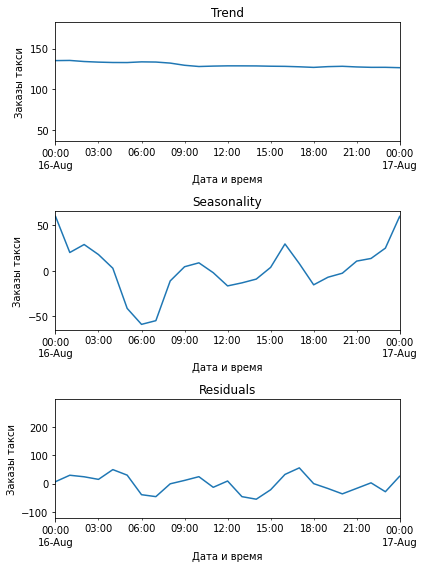

In [17]:
# Посмотрю данные за два дня 16 и 17 августа.
left = pd.Timestamp('2018-08-16 00:00:00')
right = pd.Timestamp('2018-08-17 00:00:00')
decompose_plot(decomposed, left, right)

Высокий спрос на такси в начале ночи сменяется глубоким провалом к шести утра. Дальше наблюдается подъемы в начале и конце рабочего дня и вновь высокий подъем к 12 часам ночи. Такой спрос отражает ритм жизни большинства людей.

Данные описывают интервал времени в несколько месяцев от 1 марта до 31 августа 2018 года. Этих данных недостаточно для определения ежегодной сезонности. 

На основании графика временного ряда можно отметить о тренде на увеличение количества вызовов такси с течением времени.

Можно отметить высокий спрос на такси в ночь с воскресенья на понедельник и дальнейший спад спроса до среды. Затем спрос начинает расти и достигает максимума к вечеру пятницы-ночи на субботу. с вечера субботы до утра воскресенья - глубокий провал. К вечеру воскресенья спрос начинает расти и достигает максимума ночью с воскресенья на понедельник.

Высокий спрос в ночь с воскресенья на понедельник также подтверждают высокие выбросы в остатке.

Такое поведение спроса, скорее всего, связано с планированием людьми начала своего отдыха на конец недели (увеличение спроса на такси к вечеру пятницы)и окончания отпуска - на воскресенье (увеличение спроса к вечеру воскресенья).

Высокий спрос на такси в начале ночи сменяется глубоким провалом к шести утра. Дальше наблюдается подъемы в начале и конце рабочего дня и вновь высокий подъем к 12 часам ночи. Такой спрос отражает ритм жизни большинства людей.

В результате, отмечаю тренд на увеличение количества вызовов такси с течением времени и ежедневную и еженедельную сезонность.

## Обучение

### Создание вспомогательных функций

Для обучения модели создам дополнительные признаки. Из календарных признаков создам месяц, день недели и час, отражающие тренд и сезонность.

In [18]:
# Функция для создания признаков для горизонта прогнозирования в один шаг.
def make_features(data, max_lag, rolling_mean_sise):
    
    df = data.copy()
    df['month'] = df.index.month
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag+1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_sise).mean()
    
    return df

In [20]:
# Создам функцию для выполнения кросс валидации на временном ряде
def time_cross_valid(model, features, target, cv):
       
    tscv = TimeSeriesSplit(n_splits=cv, gap=0, max_train_size=None, test_size=None)
    rmse = cross_val_score(model, features, target, cv=tscv, scoring='neg_root_mean_squared_error')
        
    return  pd.Series(-rmse).mean()

### Подготовка данных к обучению

In [21]:
# Создам дополнительные признаки и удалю строки с пропущенными зхначениями.
df = make_features(data, 24, 1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   month         4392 non-null   int64  
 2   dayofweek     4392 non-null   int64  
 3   hour          4392 non-null   int64  
 4   lag_1         4392 non-null   float64
 5   lag_2         4392 non-null   float64
 6   lag_3         4392 non-null   float64
 7   lag_4         4392 non-null   float64
 8   lag_5         4392 non-null   float64
 9   lag_6         4392 non-null   float64
 10  lag_7         4392 non-null   float64
 11  lag_8         4392 non-null   float64
 12  lag_9         4392 non-null   float64
 13  lag_10        4392 non-null   float64
 14  lag_11        4392 non-null   float64
 15  lag_12        4392 non-null   float64
 16  lag_13        4392 non-null   float64
 17  lag_14        4392 non-null

In [22]:
# Выделю из данных целевой признак.
features = df.drop('num_orders', axis=1)
target = df['num_orders']

In [23]:
features.shape, target.shape

((4392, 28), (4392,))

In [24]:
# Разделю выборки на тренировочные и тестовые.
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.1)

In [25]:
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((3952, 28), (3952,), (440, 28), (440,))

### Прогнозирование медианным значением

Для последующего сравнения результатов прогнозирования различных моделей оценю значение метрики RMSE при прогнозировании медианным значением.

In [26]:
predict = np.ones(target_train.shape) * target_train.median()
rmse = mean_squared_error(target_train, predict, squared=False)
print('При прогнозировании медианным значением на тренировочной выборке RMSE =', rmse)

При прогнозировании медианным значением на тренировочной выборке RMSE = 38.85899194601848


### Модель линейная регрессия

In [27]:
models = []
rmse_list = []

In [28]:
model_lr = LinearRegression()
name = 'Линейная регрессия'

In [29]:
rmse = time_cross_valid(model_lr, features_train, target_train, 3)
print('Для модели {} значение RMSE ='.format(name), rmse)

Для модели Линейная регрессия значение RMSE = 27.644101785703743


In [30]:
models.append(name)
rmse_list.append(rmse)

### Модель эластичная сеть

In [31]:
name = 'Эластичная сеть'
best_alpha = 0
best_l1 = 0
best_rmse = 10000
for value1 in range(10, 100, 10):
    alpha = value1 / 100
    for value2 in range(10, 100, 10):
        l1 = value2 / 100
        model_en = ElasticNet(alpha=alpha, l1_ratio=l1)
        rmse = time_cross_valid(model_en, features_train, target_train, 3)
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
            best_l1 = l1
print('Для модели {} значение RMSE ='.format(name), rmse)
print('Alpha = ', best_alpha, 'l1_ratio =', best_l1)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148101.27957995867, tolerance: 84.8555339068826
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347214.0540243049, tolerance: 202.55303704453448
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583307.6650325351, tolerance: 341.39019338731447
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective d

Для модели Эластичная сеть значение RMSE = 27.708111632063236
Alpha =  0.1 l1_ratio = 0.9


In [32]:
models.append(name)
rmse_list.append(rmse)

### Модель Случайный лес

In [33]:
name ='Случайный лес'
best_est = 0
best_depth = 0
best_rmse = 1000.
for est in range(10, 101, 10):
    for depth in [None] + [i for i in range(2, 11, 2)]:
        model_rf = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
        rmse = time_cross_valid(model_rf, features_train, target_train, 3)
        if rmse < best_rmse:
            best_rmse = rmse
            best_depth = depth
            best_est = est
print('Для модели {} значение RMSE ='.format(name), rmse)
print('n-estimators =', best_est, 'max_depth =', best_depth)

Для модели Случайный лес значение RMSE = 27.20970009567641
n-estimators = 70 max_depth = None


In [34]:
models.append(name)
rmse_list.append(rmse)

### Модель градиентный бустинг LightGBM

In [35]:
name = 'Градиентный бустинг LightGBM'
best_rmse = 100000
best_lr = 0.1
best_depth = 4
best_est = 50
best_leave = 15

#Число итераций в бустинге.
for est in [40, 60]:
    # Скорость обучения.
    for lr in [0.01, 0.1]:
        # Максимальное количество листьев.
        for leave in [20, 30]:
            # Максимальная глубина дерева.
            for depth in [10, 12, 14]:
                model_ltb = ltb.LGBMRegressor(num_leaves=leave, n_estimators=est,
                                              max_depth=depth, learning_rate=lr, random_state=12345, verbose=500)
                rmse = time_cross_valid(model_ltb, features_train, target_train, 3)
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_lr = lr
                    best_depth = depth
                    best_est = est
                    best_leave = leave
                    best_model_ltb = model_ltb
print('Для модели {} значение RMSE ='.format(name), rmse)
print('лучшие параметры: num_leaves', best_leave, 'n_estimators', best_est, 'max_depth', best_depth,
      'learning_rate:', best_lr)

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.033654
[LightGBM] [Debug] init for col-wise cost 0.000013 seconds, init for row-wise cost 0.001013 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2875
[LightGBM] [Info] Number of data points in the train set: 988, number of used features: 28
[LightGBM] [Info] Start training from score 57.280364
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Train

In [36]:
models.append(name)
rmse_list.append(rmse)

### Анализ моделей

In [37]:
df = pd.DataFrame(data={'Модель':models, 'RMSE':rmse_list})
df

,Модель,RMSE
0,Линейная регрессия,27.644102
1,Эластичная сеть,27.708112
2,Случайный лес,27.209700
3,Градиентный бустинг LightGBM,26.629086


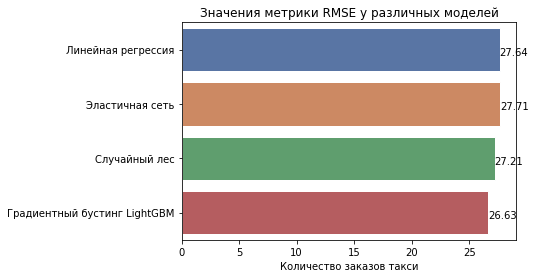

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_theme()
ax = sns.barplot(x=rmse_list, y=models, tick_label=rmse_list)
ax.set_title('Значения метрики RMSE у различных моделей', fontsize=12)
ax.set_xlabel('Количество заказов такси')
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize=10, color='black')

При предсказании медианным значением значение метрики RMSE составило 38.86.

Для построения моделей быля создана функция кросс-валидации, не перемешивающая данные.

Были постоены и проверены с помощью кросс-валидации модели линейная регрессия, эластичная сеть, случайный лес и градиентный бустинг LightGBM. Эластичная сеть показала значение метрики RMSE - 27.71, линейная регрессия - 27.64, случайный лес - 27.21. Лучшее значение метрики RMSE (26.63) показала модель градиентный бустинг LightGBM. Значения метрик RMSE у всех моделей ниже , чем у предсказания медианным значением, то есть все модели адекватны.

Рекомендую заказчику использовать модель градиентный бустинг LightGBM для предсказания количества заказов такси на следующий час.

## Тестирование

In [39]:
def plot_predict(target, predict, left, right, title):
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(target, label='target')
    ax.plot(predict, label='predict')
    plt.xlim(left=left)
    plt.xlim(right=right)
    plt.legend()
    plt.title('Целевой признак и предсказание\nна {} данных'.format(title))
    plt.xlabel('Дата и время')
    plt.ylabel('Количество заказов такси')
    plt.show();

In [40]:
model_ltb = ltb.LGBMRegressor(num_leaves=20, n_estimators=60,
                                              max_depth=10, learning_rate=0.1, verbose=500)
model_ltb.fit(features_train, target_train)

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.006850
[LightGBM] [Debug] init for col-wise cost 0.003976 seconds, init for row-wise cost 0.193454 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.204092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4780
[LightGBM] [Info] Number of data points in the train set: 3952, number of used features: 28
[LightGBM] [Info] Start training from score 78.451417
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and depth = 6
[LightGBM] [Debug] Trai

LGBMRegressor(max_depth=10, n_estimators=60, num_leaves=20, verbose=500)

In [41]:
predict_train = model_ltb.predict(features_train)
rmse = mean_squared_error(target_train, predict_train, squared=False)
print('Для модели градиентный бустинг LightGBM на тренировочной выборке значение RMSE =', rmse)

Для модели градиентный бустинг LightGBM на тренировочной выборке значение RMSE = 16.96751356715597


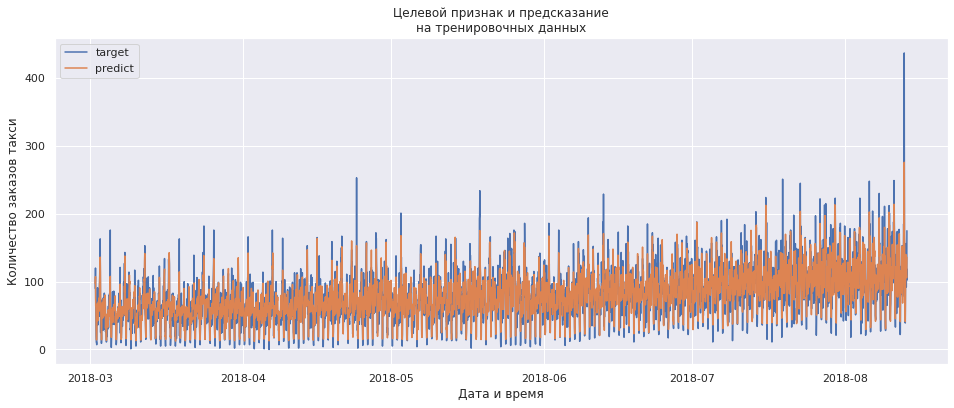

In [42]:
predict_train = pd.Series(predict_train, index=target_train.index)
plot_predict(target_train, predict_train, None, None, 'тренировочных')

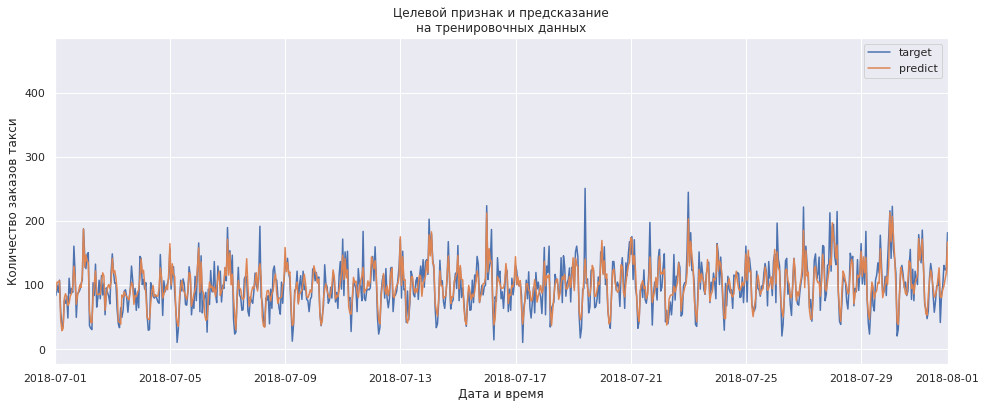

In [43]:
predict_train = pd.Series(predict_train, index=target_train.index)
left = pd.Timestamp('2018-07-01 00:00:00')
right = pd.Timestamp('2018-08-01 00:00:00')
plot_predict(target, predict_train, left, right, 'тренировочных')

На тренировочной выборке предсказания достаточно хорошо повторяют временной ряд целевого признака.

In [44]:
predict_test = model_ltb.predict(features_test)
rmse = mean_squared_error(target_test, predict_test, squared=False)
print('Для модели градиентный бустинг LightGBM на тестовой выборке значение RMSE =', rmse)

Для модели градиентный бустинг LightGBM на тестовой выборке значение RMSE = 41.90789247112257


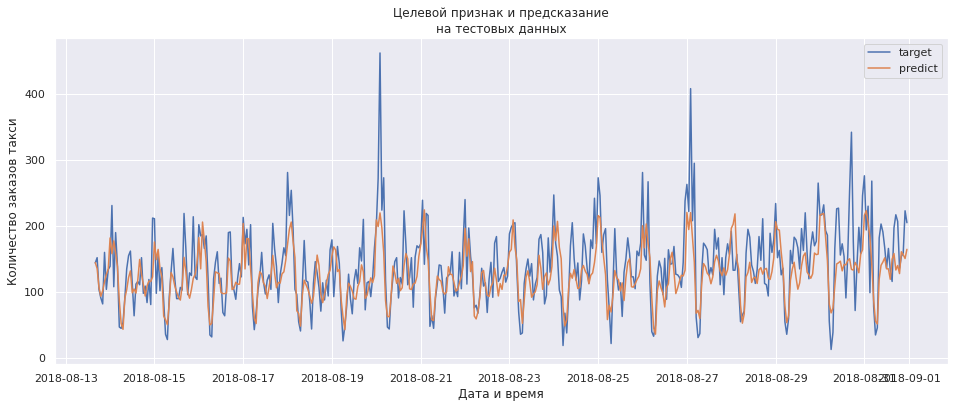

In [45]:
predict_test = pd.Series(predict_test, index=target_test.index)
plot_predict(target_test, predict_test, None, None, 'тестовых')

На тестовой выборке предсказания также хорошо повторяют форму временного ряда целевого признака.

Модель градиентный бустинг LightGBM на тестовой выборке показала значение RMSE =41.9, что меньше установленного порога 48.

### Выводы

Передо мной стояла задача построить модель с наилучшим значением метрики RMSE для прогнозирования количества заказов такси на следующий час на основании исторических данных.

1. Чтение и изучение данных.

Исходные данные содержат два столбца (дата/время и количество заказов за единицу времени) и 26496 строк. При чтении столбец, содержащий дату и время был преобразован в индекс и проверен на хронологичность и пропуски. Индексы хронологичны и пропусков в них нет. Название столбца соответствует стандарту. Данные представляют из себя временной ряд. Для дальнейшего анализа данные в таблице были сэмплированы с дискретом в один час. Пропусков в данных нет.

2. Анализ данных.

Данные описывают интервал времени в несколько месяцев от 1 марта до 31 августа 2018 года. Этих данных недостаточно для определения ежегодной сезонности.

На основании графика временного ряда можно отметить о тренде на увеличение количества вызовов такси с течением времени.

Можно отметить высокий спрос на такси в ночь с воскресенья на понедельник и дальнейший спад спроса до среды. Затем спрос начинает расти и достигает максимума к вечеру пятницы-ночи на субботу. с вечера субботы до утра воскресенья - глубокий провал. К вечеру воскресенья спрос начинает расти и достигает максимума ночью с воскресенья на понедельник.

Высокий спрос в ночь с воскресенья на понедельник также подтверждают высокие выбросы в остатке.

Такое поведение спроса, скорее всего, связано с планированием людьми начала своего отдыха на конец недели (увеличение спроса на такси к вечеру пятницы)и окончания отпуска - на воскресенье (увеличение спроса к вечеру воскресенья).

Высокий спрос на такси в начале ночи сменяется глубоким провалом к шести утра. Дальше наблюдается подъемы в начале и конце рабочего дня и вновь высокий подъем к 12 часам ночи. Такой спрос отражает ритм жизни большинства людей.

В результате, отмечаю тренд на увеличение количества вызовов такси с течением времени и ежедневную и еженедельную сезонность.


3. Построение моделей.

Для построения моделей быля создана функция кросс-валидации, не перемешивающая данные.

Были постоены и проверены с помощью кросс-валидации модели линейная регрессия, эластичная сеть, случайный лес и градиентный бустинг LightGBM. Эластичная сеть показала значение метрики RMSE - 27.71, линейная регрессия - 27.64, случайный лес - 27.21. Лучшее значение метрики RMSE (26.63) показала модель градиентный бустинг LightGBM. Значения метрик RMSE у всех моделей ниже , чем у предсказания медианным значением, то есть все модели адекватны.

Рекомендую заказчику использовать модель градиентный бустинг LightGBM для предсказания количества заказов такси на следующий час.

4. Тестирование модели.

Выбранная модельградиентный бустинг LightGBM была протестирована. Ее значение метрики RMSE на тестовой выборке составило  41.9.

Модель  прошла проверку и может быть использована при прогнозировании количества заказов такси на следующий час.